In [43]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Getting the Data

Import data and load it to the dataframe.

In [44]:
DATASET_PATH = '/home/alk/aau/datasets'

SVEBOLLE_PATH = os.path.join(DATASET_PATH, 'Svebolle')
SVEBOLLE_CSV = 'LORA_data.csv'



def load_data(path, csv_file, sep=','):
    """default sep param is ','"""
    csv_path = os.path.join(path, csv_file)
    return pd.read_csv(csv_path, sep)


data = load_data(SVEBOLLE_PATH, SVEBOLLE_CSV,
                 sep=';')

## Creating Time-Series

Only message type needed is *Confirmed Data Up* since it represents packets that are successfully transmitted and acknowledged.

In [45]:
data = data[data['mType']=='Confirmed Data Up']

In [46]:
data.mType.value_counts()

Confirmed Data Up    689123
Name: mType, dtype: int64

In [47]:
data.head()

,Time,DevAddr,Freq,Chan,BW,SPF,RSSI,SNR,4/5,dataRate,crcStatus,mType,macPayload,_id
0,2017-01-02 12:08:27.788000,000013c1,868100000,0,125,7,-120,-1.0,4/5,"{u'modulation': u'LORA', u'bandwidth': 125, u'...",1,Confirmed Data Up,c1130000804605039977d43d70b12724eea946c5a41f42...,586a34acb5866106ea976eb5
1,2017-01-02 12:08:29.196000,000013b8,868500000,2,125,7,-58,6.5,4/5,"{u'modulation': u'LORA', u'bandwidth': 125, u'...",1,Confirmed Data Up,b813000000142b0352619fc9a89e0e561d060ca3ac29e5...,586a34aeb5866106ea976eb6
2,2017-01-02 12:08:44.520000,000013bf,868300000,1,125,7,"-118,8",-1.8,4/5,"{u'modulation': u'LORA', u'bandwidth': 125, u'...",1,Confirmed Data Up,bf13000080ba30042ea26888992702442c832fc2c8ac91...,586a34bdb5866106ea976eb7
3,2017-01-02 12:08:55.347000,000013bf,868500000,2,125,7,-115,1.8,4/5,"{u'modulation': u'LORA', u'bandwidth': 125, u'...",1,Confirmed Data Up,bf13000080bb30030a96702f4ebe2cfe8559765a622344...,586a34c8b5866106ea976eb8
4,2017-01-02 12:08:55.346000,000013bf,868500000,2,125,7,-115,1.8,4/5,"{u'modulation': u'LORA', u'bandwidth': 125, u'...",1,Confirmed Data Up,bf13000080bb30030a96702f4ebe2cfe8559765a622344...,586a34c8b5866106ea976eb9


Since the future model will be based upon meta data (will be created as meta learning model) we can neglect all measured parameters and see only if the device has been active in single time point.

In [48]:
data = data[['Time', 'DevAddr']]
data.head()

,Time,DevAddr
0,2017-01-02 12:08:27.788000,000013c1
1,2017-01-02 12:08:29.196000,000013b8
2,2017-01-02 12:08:44.520000,000013bf
3,2017-01-02 12:08:55.347000,000013bf
4,2017-01-02 12:08:55.346000,000013bf


Measurement is carried out during almost one year period so it is important to get rid of that extreme nanosecond resolution in *Time* column. Lets leave it on seconds for now. Then transform *Time* column into datetime format and sort it.

In [49]:
# removing nanoseconds
Time = list(data.Time.values)
Time_parsed = []
sep = '.'
for t in Time:
    t_parsed = t.split(sep, 1)[0]
    Time_parsed.append(t_parsed)

In [50]:
data.Time = Time_parsed

In [51]:
data['Time'] = pd.to_datetime(data['Time'])

In [52]:
data.head()

,Time,DevAddr
0,2017-01-02 12:08:27,000013c1
1,2017-01-02 12:08:29,000013b8
2,2017-01-02 12:08:44,000013bf
3,2017-01-02 12:08:55,000013bf
4,2017-01-02 12:08:55,000013bf


In [53]:
# sorting 
data = data.sort_values('Time')
data = data.reset_index(drop=True)
print('number of transmissions:', len(data))
data.head()

number of transmissions: 689123


,Time,DevAddr
0,2017-01-02 00:07:00,000013b7
1,2017-01-02 02:40:00,000013bf
2,2017-01-02 02:51:00,000013c1
3,2017-01-02 12:08:27,000013c1
4,2017-01-02 12:08:29,000013b8


## Creating new Dataset

Preparing columns and indeces for new dataset filled with zero values. 

In [54]:
columns = list(data.DevAddr.unique())

In [55]:
datetime_index = pd.DatetimeIndex(start='2017-08-01 00:00:00',freq='s', end='2017-08-01 23:59:59')
len(datetime_index)

86400

In [56]:
d = {c : np.zeros(shape=(len(datetime_index), )) for c in columns}
d

{'000013b7': array([0., 0., 0., ..., 0., 0., 0.]),
 '000013bf': array([0., 0., 0., ..., 0., 0., 0.]),
 '000013c1': array([0., 0., 0., ..., 0., 0., 0.]),
 '000013b8': array([0., 0., 0., ..., 0., 0., 0.]),
 '0400060e': array([0., 0., 0., ..., 0., 0., 0.]),
 '4000624': array([0., 0., 0., ..., 0., 0., 0.]),
 '0400062c': array([0., 0., 0., ..., 0., 0., 0.]),
 '4000625': array([0., 0., 0., ..., 0., 0., 0.]),
 '0400062e': array([0., 0., 0., ..., 0., 0., 0.]),
 '4000630': array([0., 0., 0., ..., 0., 0., 0.]),
 '5e0001e1': array([0., 0., 0., ..., 0., 0., 0.]),
 '5e001363': array([0., 0., 0., ..., 0., 0., 0.]),
 '33306167': array([0., 0., 0., ..., 0., 0., 0.]),
 '33306168': array([0., 0., 0., ..., 0., 0., 0.]),
 '5e00136b': array([0., 0., 0., ..., 0., 0., 0.]),
 '000013ba': array([0., 0., 0., ..., 0., 0., 0.]),
 '000013b9': array([0., 0., 0., ..., 0., 0., 0.]),
 '000013b6': array([0., 0., 0., ..., 0., 0., 0.]),
 '000013bc': array([0., 0., 0., ..., 0., 0., 0.]),
 '000013be': array([0., 0., 0., ..

## Test dataframe for single device

In [57]:
df_temp = pd.DataFrame(data={'Time' : datetime_index,
                             'dev' : np.zeros(shape=(len(datetime_index), )) }
                      )
df_temp = df_temp.set_index('Time')
df_temp.head()

,dev
Time,
2017-08-01 00:00:00,0.0
2017-08-01 00:00:01,0.0
2017-08-01 00:00:02,0.0
2017-08-01 00:00:03,0.0
2017-08-01 00:00:04,0.0


First dataset will contain only messages from 12b7 device.

In [58]:
data_temp = data[data['DevAddr'] == '000013b7']

In [59]:
data_temp = data_temp.set_index('Time')
data_temp.head()

,DevAddr
Time,
2017-01-02 00:07:00,000013b7
2017-01-02 12:09:00,000013b7
2017-01-02 12:09:04,000013b7
2017-01-02 12:09:09,000013b7
2017-01-02 12:11:09,000013b7


In [60]:
# new dataset filled w/ ones for every time device 13b7 was active

ind = list(data_temp.index.values)
for i in ind:
    df_temp.loc[i, 'dev'] = 1.0

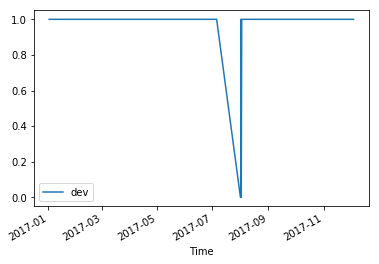

In [61]:
df_temp.plot()

## LSTM in Keras

In [70]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import Dense
from keras.layers import LSTM
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error

In [63]:
def timeDelay(data, delay):
    X_data, y_data = [], []
    
    for i in range(delay, len(data)):
        X_data.append(data[i-delay: i].tolist())
    X_data = np.array(X_data)
    y_data = data[delay:]
    return np.reshape(X_data, (X_data.shape[0], X_data.shape[1], 1)),\
           np.reshape(y_data, (len(y_data), ))

In [71]:
def split(X, y, ratio):    
    test_split = int(len(X) * ratio)
    
    X_train, y_train = X[:test_split], y[:test_split]
    X_test, y_test = X[test_split:], y[test_split:]
    return X_train, y_train, X_test, y_test

In [65]:
X, y = timeDelay(df_temp.dev.values, 5) # train test
ratio = 0.8 # train-test ratio
window_size = 5 # delay

X_train, y_train, X_test, y_test = split(X, y, ratio)

In [72]:
model = Sequential()
model.add(LSTM(50, input_shape=(window_size, 1))) # 50 neurons
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('linear'))
model.compile(loss='mse', optimizer='adam')

In [73]:
history = model.fit(X_train, y_train, 
                        epochs=20, 
                        batch_size=32, 
                        validation_data=(X_test, y_test), 
                        verbose=2, 
                        shuffle=False)

Train on 213706 samples, validate on 53427 samples
Epoch 1/20
 - 24s - loss: 0.0022 - val_loss: 3.3382e-05
Epoch 2/20
 - 22s - loss: 0.0024 - val_loss: 3.1719e-08
Epoch 3/20
 - 22s - loss: 0.0018 - val_loss: 9.0575e-07
Epoch 4/20
 - 20s - loss: 0.0017 - val_loss: 1.8615e-06
Epoch 5/20
 - 21s - loss: 0.0017 - val_loss: 9.7745e-07
Epoch 6/20
 - 20s - loss: 0.0017 - val_loss: 2.2920e-07
Epoch 7/20
 - 26s - loss: 0.0017 - val_loss: 2.7362e-07
Epoch 8/20
 - 21s - loss: 0.0016 - val_loss: 3.2293e-07
Epoch 9/20
 - 20s - loss: 0.0016 - val_loss: 9.5401e-08
Epoch 10/20
 - 22s - loss: 0.0016 - val_loss: 1.2909e-07
Epoch 11/20
 - 20s - loss: 0.0016 - val_loss: 5.4732e-07
Epoch 12/20
 - 22s - loss: 0.0016 - val_loss: 5.3981e-08
Epoch 13/20
 - 21s - loss: 0.0016 - val_loss: 1.4129e-06
Epoch 14/20
 - 22s - loss: 0.0016 - val_loss: 2.3341e-06
Epoch 15/20
 - 21s - loss: 0.0016 - val_loss: 1.4756e-08
Epoch 16/20
 - 20s - loss: 0.0016 - val_loss: 1.5047e-08
Epoch 17/20
 - 25s - loss: 0.0016 - val_loss: 

In [74]:
# generate predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [76]:
import math

# Estimate model performance
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.11 MSE (0.33 RMSE)
Test Score: 0.00 MSE (0.00 RMSE)
